# kNN basic practice

## sklearn.neighbors

docs: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

examples: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Toy task - only 2 features

In [2]:
classification_problem = datasets.make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_classes=3,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=3,
)

In [3]:
def plot_dataset(dataset: (np.ndarray, np.ndarray)):
    colors = ListedColormap(["red", "blue", "yellow"])

    plt.figure(figsize=(16, 9))
    plt.grid()
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=dataset[1], cmap=colors, s=100)
    plt.show()

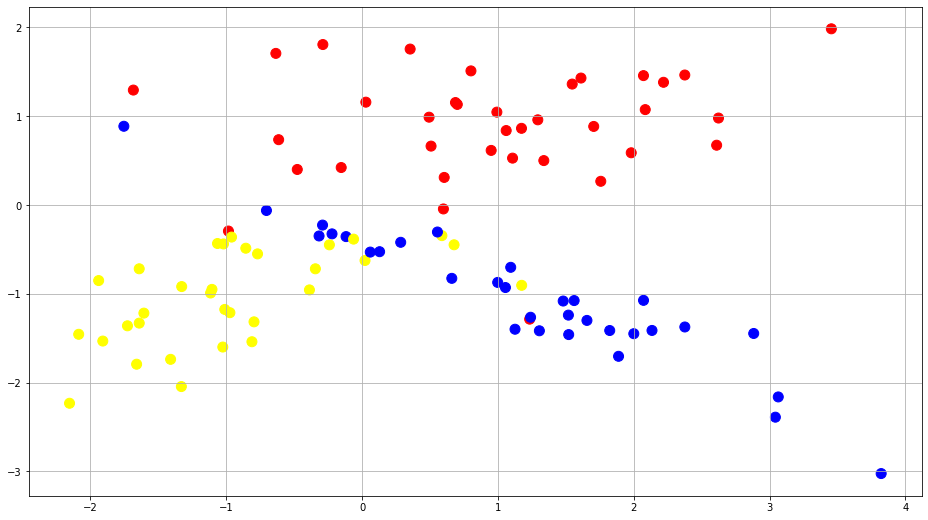

In [4]:
plot_dataset(classification_problem)

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(
    *classification_problem,
    test_size=0.3,
    random_state=1,
)

# Let's build our model!

In [6]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier()

In [7]:
predictions = clf.predict(test_data)
accuracy_score(test_labels, predictions)

0.9

In [8]:
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0,
       2, 0, 0, 0, 1, 1, 2, 0])

### And visualize

In [9]:
def make_meshgrid(
    data: np.ndarray,
    step: float = 0.05,
    border: float = 0.5,
):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [10]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels):
    colors = ListedColormap(["red", "blue", "yellow"])
    light_colors = ListedColormap(["lightcoral", "lightblue", "lightyellow"])

    # fit model
    estimator.fit(train_data, train_labels)

    # set figure size
    fig = plt.figure(figsize=(16, 6))
    fig.suptitle(estimator)

    # plot decision surface on the train data
    plt.subplot(1, 2, 1)
    xx, yy = make_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors, shading="auto")
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    acc = accuracy_score(train_labels, estimator.predict(train_data))
    plt.title(f"Train data, accuracy={acc:.2f}")

    # plot decision surface on the test data
    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors, shading="auto")
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    acc = accuracy_score(test_labels, estimator.predict(test_data))
    plt.title(f"Test data, accuracy={acc:.2f}")

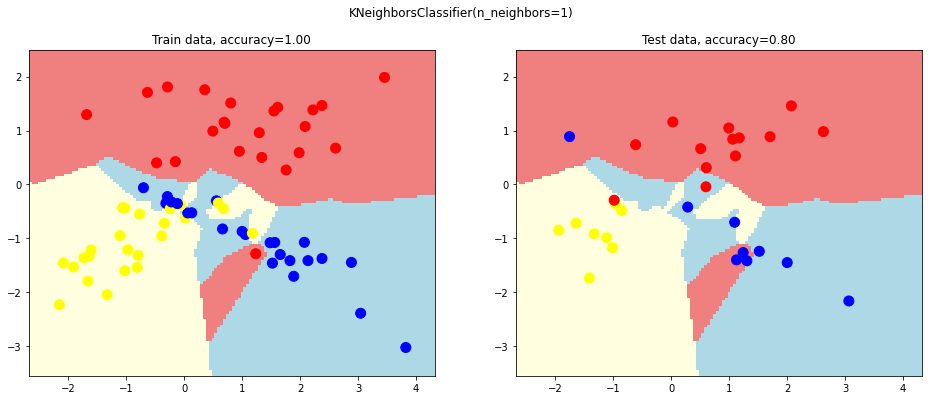

In [11]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

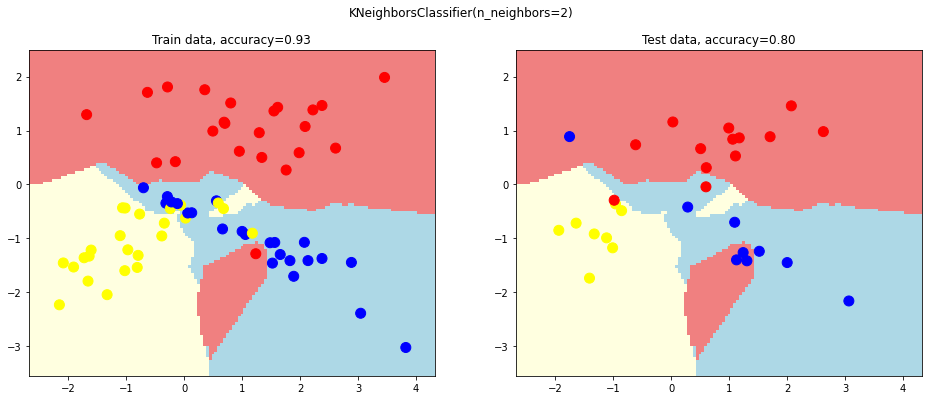

In [12]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

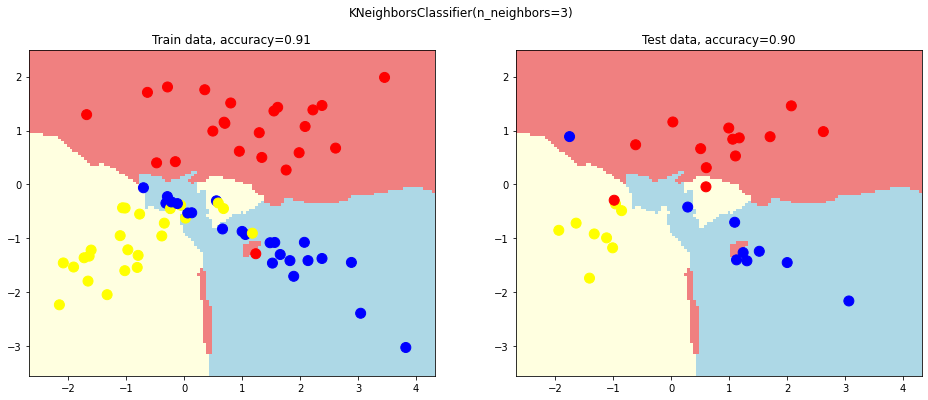

In [13]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

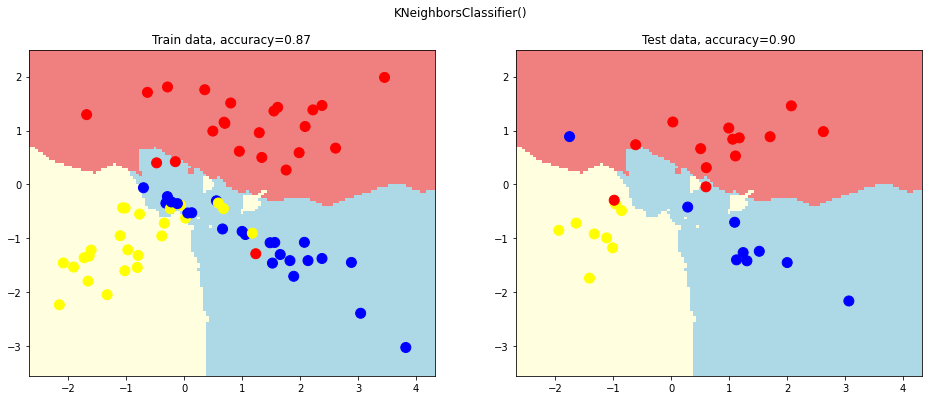

In [14]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

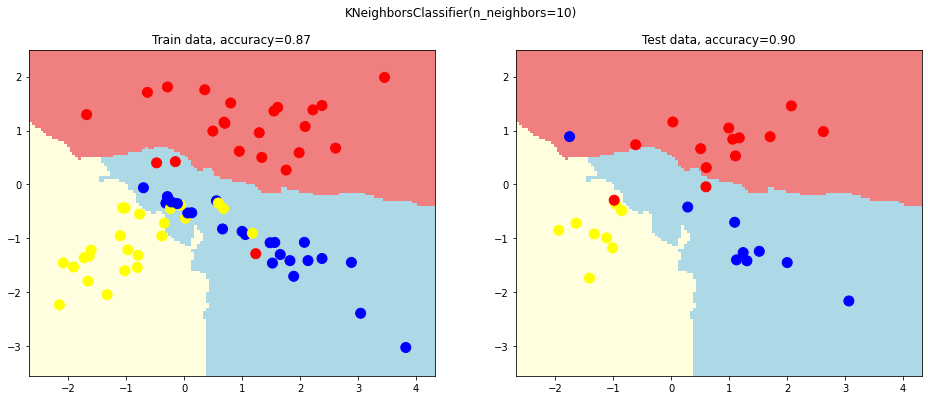

In [15]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

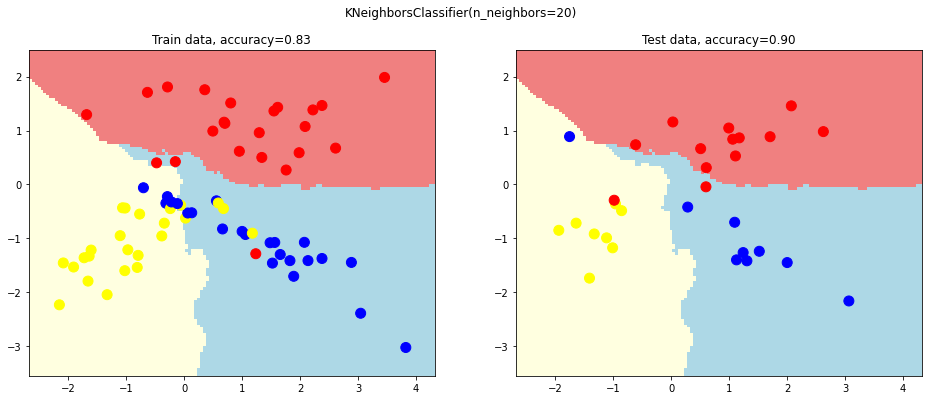

In [16]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

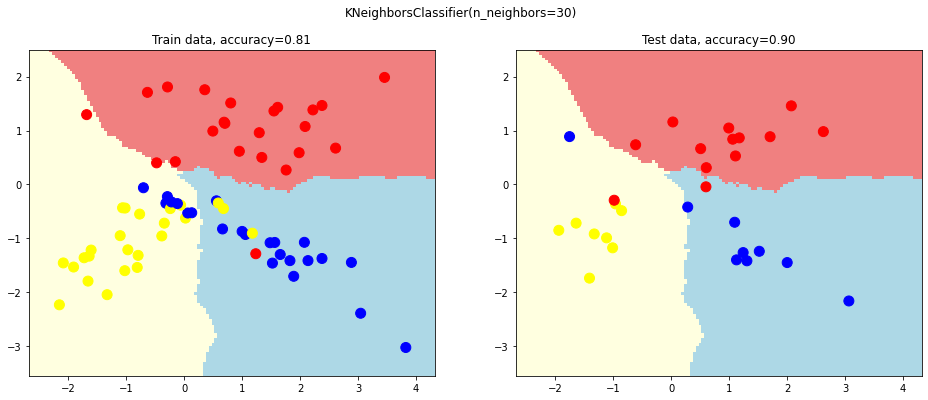

In [17]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

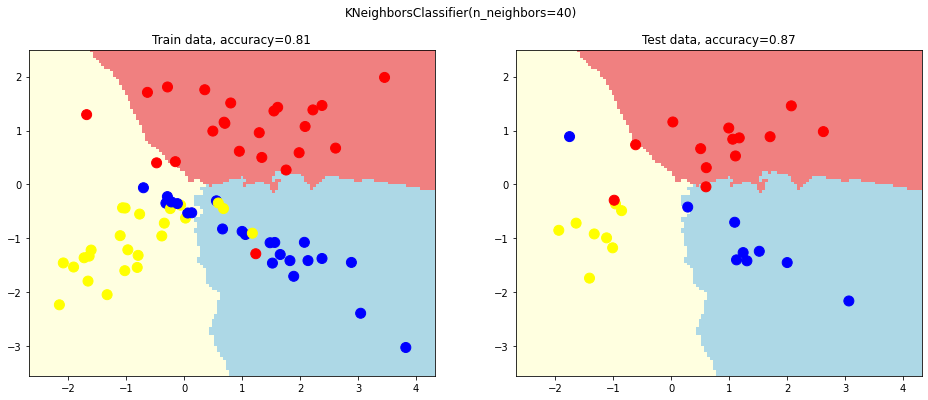

In [18]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=40)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

## Seems good!

In [19]:
hard_problem = datasets.make_classification(
    n_samples=100,
    n_features=100,
    n_informative=50,
    n_classes=3,
    n_redundant=50,
    n_clusters_per_class=1,
    random_state=42,
)

In [20]:
train_data, test_data, train_labels, test_labels = train_test_split(
    *hard_problem,
    test_size=0.3,
    random_state=1,
)

In [21]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(train_data, train_labels)

KNeighborsClassifier()

In [22]:
predictions = clf.predict(test_data)
accuracy_score(test_labels, predictions)

0.6

## Or not so good...

In [23]:
def train_knn_classifier(dimensions, n_classes):
    scores = []

    for dim in dimensions:
        problem = datasets.make_classification(
            n_samples=1000,
            n_features=dim,
            n_informative=dim // 2,
            n_classes=5,
            n_redundant=dim // 2,
            n_clusters_per_class=1,
            random_state=42,
        )

        train_data, test_data, train_labels, test_labels = train_test_split(
            problem[0],
            problem[1],
            test_size=0.3,
            random_state=1,
        )

        clf = neighbors.KNeighborsClassifier(n_neighbors=5)
        clf.fit(train_data, train_labels)

        predictions = clf.predict(test_data)
        acc = accuracy_score(test_labels, predictions)

        scores.append(acc)

    plt.figure(figsize=(12, 7))
    plt.plot(dimensions, scores)
    plt.grid()
    plt.show()

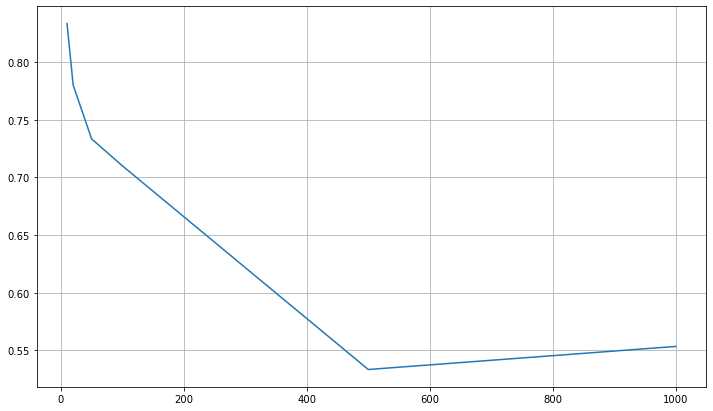

In [24]:
train_knn_classifier([10, 20, 50, 100, 500, 1000], 5)

# Practice area

Now let's try and train a simple (or not so) kNN classifier on a more complicated dataset.

In [25]:
# If you are using colab, uncomment this cell

# !curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data > ../datasets/wine.csv

In [26]:
dataset = pd.read_csv("../datasets/wine.csv", header=None)
dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/wine.csv'

In [ ]:
X = dataset.drop(0, axis=1).to_numpy()
y = dataset[0].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

In [ ]:
# YOUR CODE HERE

# Bonus area

**Those who gets accuracy of at least 0.8 recieves bonus (0.5 max)**

In [ ]:
# YOUR CODE HERE